### __Chi-Squared goodness of fit__

here we use satas.chisquare
primarilly used fro cunducting a chi-square goodness-of-fit test, which compress observed frequencies with expected frequincies under a specified theoratical distribution

In [47]:
import numpy as np
import pandas as pd
import scipy.stats as stats

fake demografic data for U.S and Minnesota state and walk through Chi-Square goodness of fit test to weather they are diffrent:

In [48]:
national = pd.DataFrame(['White']*100000+['hispanic']*60000+\
                        ['black']*50000+['asian']*15000 + ['other']*35000)
national.sample(5)

,0
12381,White
126814,hispanic
110118,hispanic
84645,White
35856,White


In [49]:
minnesota = pd.DataFrame(['White']*600+['hispanic']*300+\
                        ['black']*250+['asian']*75 + ['other']*150)
minnesota.sample(5)

,0
775,hispanic
496,White
134,White
914,black
1021,black


* create frequincy table(crosstable) for both datasets using pd.crosstab.
* national_table and minnesota_table stores the counts of each demographic catagory

In [50]:
national_table = pd.crosstab(index =  national[0],columns = 'count')
minnesota_table = pd.crosstab(index =  minnesota[0],columns = 'count')

print(national)
print(national_table)

            0
0       White
1       White
2       White
3       White
4       White
...       ...
259995  other
259996  other
259997  other
259998  other
259999  other

[260000 rows x 1 columns]
col_0      count
0               
White     100000
asian      15000
black      50000
hispanic   60000
other      35000


In [51]:
print(minnesota)
print(minnesota_table)

          0
0     White
1     White
2     White
3     White
4     White
...     ...
1370  other
1371  other
1372  other
1373  other
1374  other

[1375 rows x 1 columns]
col_0     count
0              
White       600
asian        75
black       250
hispanic    300
other       150


In [52]:
observed = minnesota_table
national_ratio = national_table/len(national) # get population ratios

calculate the expected counts by multiplying the polpulation ratios in the national dataset by number of observations in the Minnesota dataset.

In [53]:
expected = national_ratio * len(minnesota) # get expected count

calculate the chi-squared statistics by comparing the obdesrved and expected counts and summing the squared diffrences, normalized by the expected counts. 

In [54]:
chi_squared_stat = (((observed-expected)**2)/expected).sum()
print('Calculated Observed value')
chi_squared_stat

Calculated Observed value


col_0
count    18.194805
dtype: float64

find the critical value for a 95% confidence interval with DF = 4

In [55]:
crit = stats.chi2.ppf(q=0.95, # find the critical value for 95% confidence
                      df = 4) # Df = number of variable catagories -1

print('critical value')
crit

critical value


9.487729036781154

calculate the p-value based on the chi-squared statistics and degrees of freedom

In [56]:
p_value = 1- stats.chi2.cdf(x=chi_squared_stat, # finds the p-value
                            df = 4)
print('p-value')
p_value

p-value


array([0.00113047])

* since our chi-squared statistics exceeeds the critical value, w'd reject the null hypothesis that the two distributions are same
* you can carryout a chi=squared goodness of fit test automatically using scipy fuction scipy.stats.chisquare():

In [57]:
stats.chisquare(f_obs=observed,f_exp=expected)

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

the test results agree with the values we calculated above

### __Chi-squared contengency__

* here we use chi2_contengency
* __Purpose__:- it is ised for cunducting a chi-square test of independence or association between two categorical variables by analizing a contengency table (AKA two-way table)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws 
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0
174,65.0,0,198,1,35,1,281000.0,0.9,137,1,1,146,0
102,80.0,0,898,0,25,0,149000.0,1.1,144,1,1,87,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
238,65.0,1,720,1,40,0,257000.0,1.0,136,0,0,210,0


In [5]:
print('Aginst Age')
print(chi2_contingency(pd.crosstab(index=df['anaemia'], columns = df['DEATH_EVENT'])))

Aginst Age
Chi2ContingencyResult(statistic=1.042175485287005, pvalue=0.3073160508415107, dof=1, expected_freq=array([[115.4180602,  54.5819398],
       [ 87.5819398,  41.4180602]]))


In [6]:
print('Aginst Diabetes')
print(chi2_contingency(pd.crosstab(index=df['diabetes'], columns = df['DEATH_EVENT'])))

Aginst Diabetes
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[118.13377926,  55.86622074],
       [ 84.86622074,  40.13377926]]))


In [7]:
print('Aginst High Blood Pressure')
print(chi2_contingency(pd.crosstab(index=df['high_blood_pressure'], columns = df['DEATH_EVENT'])))

Aginst High Blood Pressure
Chi2ContingencyResult(statistic=1.5434607612967581, pvalue=0.21410341199416902, dof=1, expected_freq=array([[131.71237458,  62.28762542],
       [ 71.28762542,  33.71237458]]))


In [8]:
print('Againts sex')
print(chi2_contingency(pd.crosstab(index=df['sex'], columns = df['DEATH_EVENT'])))

Againts sex
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[ 71.28762542,  33.71237458],
       [131.71237458,  62.28762542]]))


the only column categorical that has relationship with Death Event is age, thta we can also see in the graph below

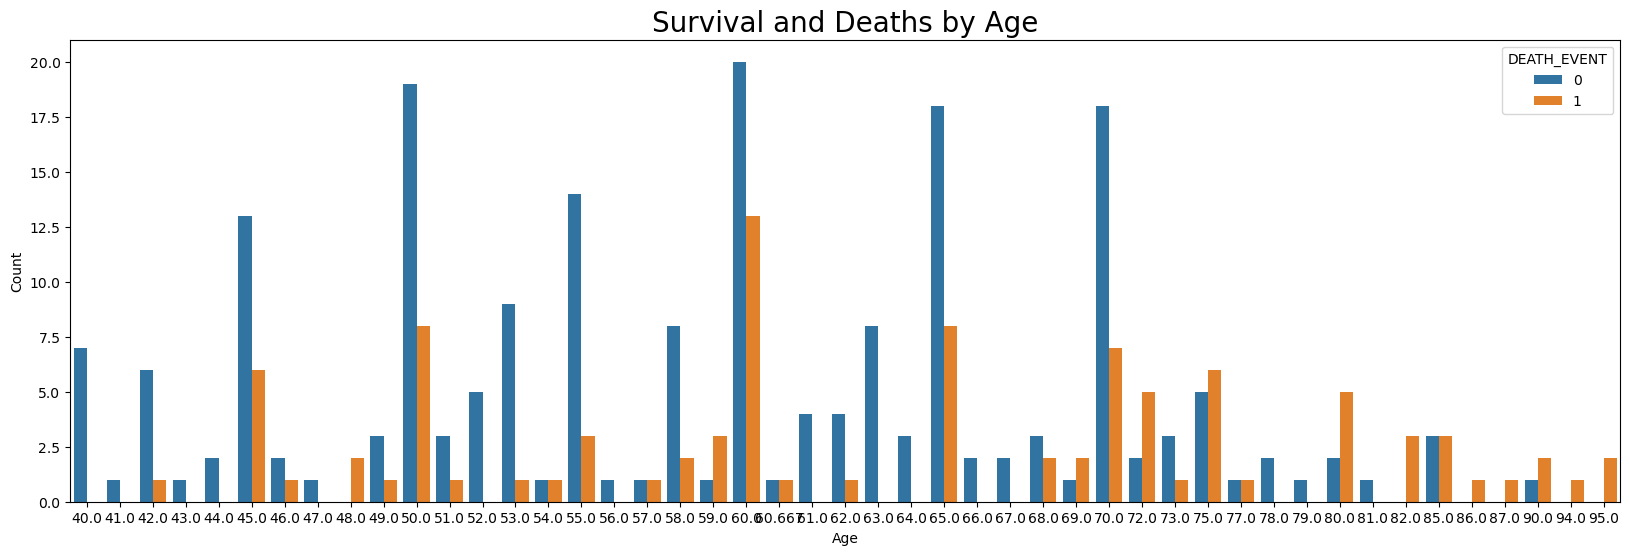

In [9]:
plt.figure(figsize=(20,6))
title = plt.title('Survival and Deaths by Age',fontsize=20)
title.set_position([0.5,1.15])
ax = sns.countplot(x='age',hue="DEATH_EVENT",data=df)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
a = ax.set_xticklabels(ax.get_xticklabels(),rotation=0,horizontalalignment='center')
plt.show()